In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.model_selection import ParameterGrid

In [84]:
df = pd.read_csv('final_combined_dataset.csv')
df

,date,week,cases,population,tempe_min,humidity_max,humidity_avg,humidity_min,temp_avg,temp_max,...,vim,vim_monthly,precipitation_avg_ordinary_kriging,precipitation_max_ordinary_kriging,precipitation_avg_regression_kriging,precipitation_max_regression_kriging,long,lat,cases_per_100k,nearby_cases_weighted
0,2012-01-01,201201,32,207044,19.000000,79.428571,55.514486,35.000000,25.048951,29.571429,...,0.850500,0.852633,5.6804,18.3375,5.2038,18.7979,-44.319627,-23.009116,15.455652,6.913995
1,2012-01-08,201202,40,207044,19.714286,82.285714,62.357393,47.428571,23.737513,26.571429,...,0.852050,0.852633,4.0716,16.5375,3.9114,16.8583,-44.319627,-23.009116,19.319565,32.825012
2,2012-01-15,201203,19,207044,20.000000,83.000000,65.236264,45.571429,24.413187,28.714286,...,0.853541,0.852633,2.0555,5.0500,1.7556,3.1368,-44.319627,-23.009116,9.176793,14.685214
3,2012-01-22,201204,33,207044,19.285714,83.000000,60.362637,43.428571,24.879121,28.857143,...,0.854877,0.852633,1.5416,5.7059,1.4138,5.2767,-44.319627,-23.009116,15.938641,2.809255
4,2012-01-29,201205,36,207044,18.857143,80.857143,50.885924,33.142857,25.989992,30.428571,...,0.856021,0.852633,2.8204,9.3826,2.0057,7.8749,-44.319627,-23.009116,17.387608,19.938997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52229,2022-11-27,202248,1,273988,21.857143,95.875069,82.840922,61.313170,25.507143,30.857143,...,0.683798,0.642000,4.9788,17.2846,4.8787,16.7239,-44.093522,-22.509968,0.364979,0.000000
52230,2022-12-04,202249,0,273988,21.857143,92.543531,80.151192,64.110460,24.903139,28.142857,...,0.701526,0.716900,1.8253,8.1846,1.9016,8.4208,-44.093522,-22.509968,0.000000,0.938861
52231,2022-12-11,202250,2,273988,21.000000,94.213747,79.480439,59.964030,24.597222,28.500000,...,0.717158,0.716900,3.2077,13.9077,3.6355,15.3869,-44.093522,-22.509968,0.729959,12.281740
52232,2022-12-18,202251,1,273988,21.000000,91.312065,84.229947,73.950180,23.184295,26.000000,...,0.729156,0.716900,1.8474,5.2631,1.8725,5.2542,-44.093522,-22.509968,0.364979,0.000000


In [85]:
df = df.drop(columns=['nearby_cases_weighted','city','week','population','tempe_min','humidity_max','humidity_min','temp_max','vim','vim_monthly','precipitation_max_ordinary_kriging','precipitation_avg_regression_kriging','precipitation_max_regression_kriging','long','lat','cases_per_100k','nearby_cases_weighted'])

In [86]:
df

,date,cases,humidity_avg,temp_avg,geocode,precipitation_avg_ordinary_kriging
0,2012-01-01,32,55.514486,25.048951,3300100,5.6804
1,2012-01-08,40,62.357393,23.737513,3300100,4.0716
2,2012-01-15,19,65.236264,24.413187,3300100,2.0555
3,2012-01-22,33,60.362637,24.879121,3300100,1.5416
4,2012-01-29,36,50.885924,25.989992,3300100,2.8204
...,...,...,...,...,...,...
52229,2022-11-27,1,82.840922,25.507143,3306305,4.9788
52230,2022-12-04,0,80.151192,24.903139,3306305,1.8253
52231,2022-12-11,2,79.480439,24.597222,3306305,3.2077
52232,2022-12-18,1,84.229947,23.184295,3306305,1.8474


In [87]:
# geocode_list = [3300407, 3300456, 3302007, 3302205, 3303807]
geocode_list = [3303807]

df = df[df['geocode'].isin(geocode_list)]
df

,date,cases,humidity_avg,temp_avg,geocode,precipitation_avg_ordinary_kriging
29274,2012-01-01,1,55.514486,25.048951,3303807,5.6804
29275,2012-01-08,0,62.357393,23.737513,3303807,3.9412
29276,2012-01-15,2,65.236264,24.413187,3303807,1.5898
29277,2012-01-22,3,60.362637,24.879121,3303807,1.1766
29278,2012-01-29,2,50.885924,25.989992,3303807,2.5209
...,...,...,...,...,...,...
29843,2022-11-27,0,79.717112,23.775511,3303807,4.9788
29844,2022-12-04,3,77.826146,25.071428,3303807,1.8253
29845,2022-12-11,3,77.462712,23.904762,3303807,3.2077
29846,2022-12-18,8,82.448150,22.517858,3303807,2.4548


In [88]:
df = df.drop(columns=['humidity_avg','temp_avg','precipitation_avg_ordinary_kriging','geocode'])
df

,date,cases
29274,2012-01-01,1
29275,2012-01-08,0
29276,2012-01-15,2
29277,2012-01-22,3
29278,2012-01-29,2
...,...,...
29843,2022-11-27,0
29844,2022-12-04,3
29845,2022-12-11,3
29846,2022-12-18,8


<Axes: >

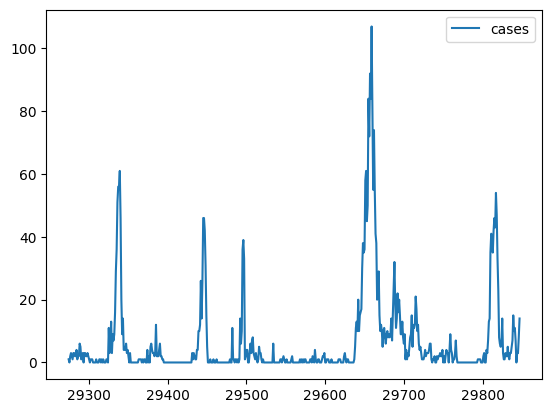

In [89]:
df.plot()

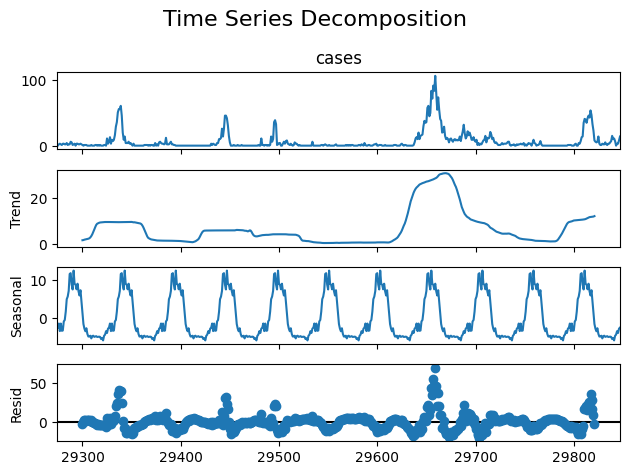

In [90]:

from statsmodels.tsa.seasonal import seasonal_decompose
# Ensure the 'date' column is in datetime format and set it as the index
df['date'] = pd.to_datetime(df['date'])
# df.set_index('date', inplace=True)

# Perform seasonal decomposition
# Since we are working with weekly data, set period=52 for yearly seasonality
decompose_result = seasonal_decompose(df['cases'], model='additive', period=52)

# Plot the decomposition
decompose_result.plot()
plt.suptitle('Time Series Decomposition', fontsize=16)
plt.tight_layout()
plt.show()

ALL seasons are looks similar so no need of seasonal differencing D =0 

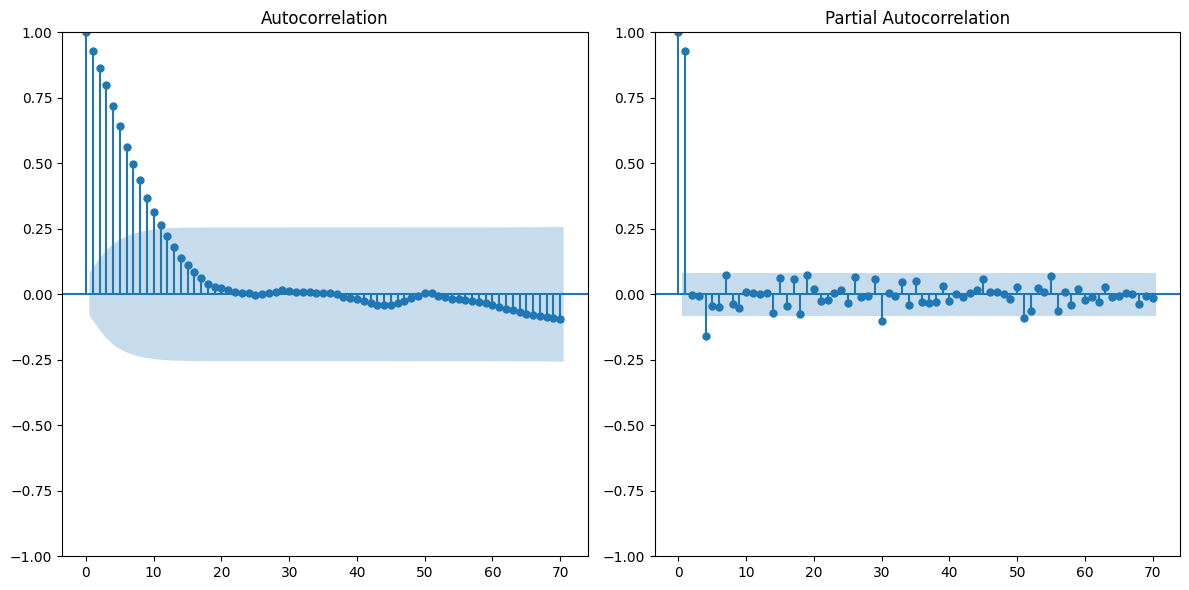

In [91]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df['cases'], lags=70, ax=plt.gca())
plt.subplot(122)
plot_pacf(df['cases'], lags=70, ax=plt.gca())

plt.tight_layout()
plt.show()

fewer number of repeated significant cycles to identify the P and Q values 
ACF dosent have any cycle, while PACF have 2 at lag 6 and 36 lets test 
P  = 2 and Q =0
also P =0 and Q =0

PACF TO EVALUATE AR MODEL
ACF TO EVALUATE MA MODEL

From this , we can say 
AR model  for non seasonal - p = 1
MA model for non seasonl - q = 0
d is 0 - from adfuller test series is stationary
P -
D - 0
Q -
S - 52

In [92]:

train_df = df[df['date'].dt.year <= 2020]
test_df = df[df['date'].dt.year >= 2021]

RMSE for rolling forecast: 7.14


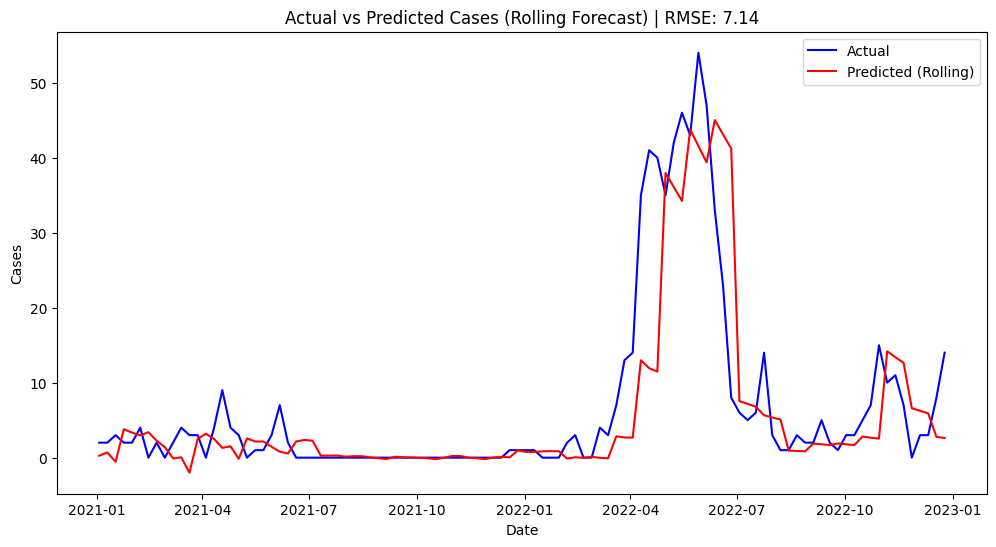

In [93]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error


train_cases = train_df.set_index('date')['cases']
test_cases = test_df.set_index('date')['cases']

# Ensure weekly frequency for consistency
train_cases = train_cases.asfreq('W')
test_cases = test_cases.asfreq('W')

# Define SARIMA parameters
sarima_order = (1, 0, 0)  # (p, d, q)
seasonal_order = (2, 0, 0, 52)  # (P, D, Q, s)

# Rolling forecast with SARIMA
rolling_predictions = []
history = list(train_cases)
forecast_horizon = 3  # Forecast 2 weeks at a time

for i in range(0, len(test_cases), forecast_horizon):
    try:
        # Fit SARIMA model
        model = SARIMAX(history, order=sarima_order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
        fit_model = model.fit(disp=False)

        # Forecast for the next `forecast_horizon` steps
        forecast = fit_model.forecast(steps=forecast_horizon)
        rolling_predictions.extend(forecast)

        # Append actual values to history for refitting
        actual_values = test_cases.iloc[i:i + forecast_horizon]
        history.extend(actual_values)

    except Exception as e:
        print(f"Failed to forecast at iteration {i}: {e}")

# Truncate predictions to match the length of the test set
rolling_predictions = rolling_predictions[:len(test_cases)]

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_cases, rolling_predictions))
print(f"RMSE for rolling forecast: {rmse:.2f}")

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(test_cases.index, test_cases, label='Actual', color='blue')
plt.plot(test_cases.index, rolling_predictions, label='Predicted (Rolling)', color='red')
plt.title(f'Actual vs Predicted Cases (Rolling Forecast) | RMSE: {rmse:.2f}')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend()
plt.show()


RMSE for rolling forecast: 6.08


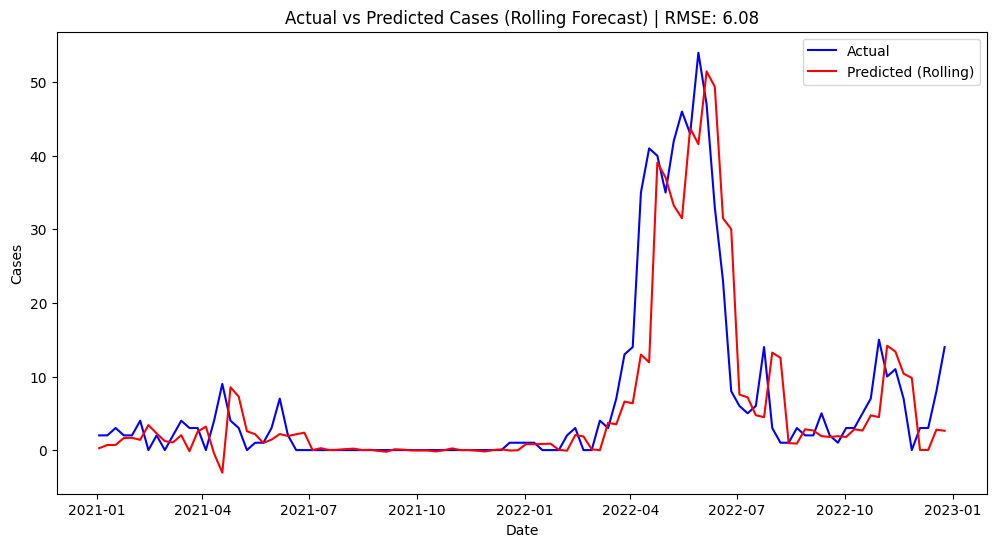

In [82]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error


train_cases = train_df.set_index('date')['cases']
test_cases = test_df.set_index('date')['cases']

# Ensure weekly frequency for consistency
train_cases = train_cases.asfreq('W')
test_cases = test_cases.asfreq('W')

# Define SARIMA parameters
sarima_order = (1, 0, 0)  # (p, d, q)
seasonal_order = (2, 0, 0, 52)  # (P, D, Q, s)

# Rolling forecast with SARIMA
rolling_predictions = []
history = list(train_cases)
forecast_horizon = 2  # Forecast 2 weeks at a time

for i in range(0, len(test_cases), forecast_horizon):
    try:
        # Fit SARIMA model
        model = SARIMAX(history, order=sarima_order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
        fit_model = model.fit(disp=False)

        # Forecast for the next `forecast_horizon` steps
        forecast = fit_model.forecast(steps=forecast_horizon)
        rolling_predictions.extend(forecast)

        # Append actual values to history for refitting
        actual_values = test_cases.iloc[i:i + forecast_horizon]
        history.extend(actual_values)

    except Exception as e:
        print(f"Failed to forecast at iteration {i}: {e}")

# Truncate predictions to match the length of the test set
rolling_predictions = rolling_predictions[:len(test_cases)]

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_cases, rolling_predictions))
print(f"RMSE for rolling forecast: {rmse:.2f}")

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(test_cases.index, test_cases, label='Actual', color='blue')
plt.plot(test_cases.index, rolling_predictions, label='Predicted (Rolling)', color='red')
plt.title(f'Actual vs Predicted Cases (Rolling Forecast) | RMSE: {rmse:.2f}')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend()
plt.show()


In [ ]:

# Grid search for best SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

cases = df['cases']

# Decompose the time series into trend, seasonal, and residuals
decomposition = seasonal_decompose(cases, model='additive', period=52)

# Combine trend and residuals for SARIMA fitting
# Since SARIMA handles seasonal data directly, we'll use only residuals if necessary
residuals = decomposition.resid.dropna()  # Drop NaNs after decomposition


best_aic = float("inf")
best_order = None
aic_results = []

# Define parameter ranges
p_range = range(0, 3)  # AR terms
d_range = [0, 1]       # Differencing terms (0 or 1)
q_range = range(0, 3)  # MA terms
P_range = range(0, 3)  # Seasonal AR terms
D_range = [0, 1]       # Seasonal differencing terms (0 or 1)
Q_range = range(0, 3)  # Seasonal MA terms
s_range = [52, 12]     # Seasonality (weekly or monthly)

for p in p_range:
    for d in d_range:
        for q in q_range:
            for P in P_range:
                for D in D_range:
                    for Q in Q_range:
                        for s in s_range:
                            try:
                                # Fit SARIMA model
                                model = SARIMAX(residuals,
                                                order=(p, d, q),
                                                seasonal_order=(P, D, Q, s))
                                fit_model = model.fit(disp=False)

                                # Store AIC
                                aic_results.append((p, d, q, P, D, Q, s, fit_model.aic))

                                # Update the best model based on AIC
                                if fit_model.aic < best_aic:
                                    best_aic = fit_model.aic
                                    best_order = (p, d, q, P, D, Q, s)

                            except Exception as e:
                                # Handle cases where SARIMA fitting fails
                                print(f"Model ({p}, {d}, {q}, {P}, {D}, {Q}, {s}) failed: {e}")

# Display the best SARIMA order
print(f"Best SARIMA order: {best_order} with AIC: {best_aic}")

c:\Program Files\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Program Files\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Program Files\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Program Files\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Program Files\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_mo

Model (0, 0, 0, 0, 0, 2, 52) failed: Unable to allocate 4.29 GiB for an array with shape (105, 105, 52183) and data type float64


c:\Program Files\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Program Files\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Program Files\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Program Files\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Program Files\Python312\Lib\site-packages\statsmodels\tsa\